## Outliers

Outliers refer to data points that significantly differ from other observations in a dataset. They can occur due to various reasons, such as measurement or input errors, natural variation in data, or rare events. Identifying outliers is important in statistics and data analysis because they can distort statistical analyses and machine learning models if not properly handled.

### Should outliers be removed?
Depending on the context, outliers either deserve special attention or should be completely ignored. Take the example of revenue forecasting: if unusual spikes of revenue are observed, it's probably a good idea to pay extra attention to them and figure out what caused the spike. In the same way, an unusual transaction on a credit card is usually a sign of fraudulent activity, which is what the credit card issuer wants to prevent. So in instances like these, it is useful to look for and investigate further outlier values.

If outliers are however, due to mechanical error, measurement error or anything else that can't be generalised, it’s a good idea to filter out these outliers before feeding the data to the modeling algorithm.

### Which machine learning models are sensitive to outliers?
Some machine learning models are more sensitive to outliers than others. For instance, AdaBoost may treat outliers as "hard" cases and put tremendous weights on outliers, therefore producing a model with bad generalisation.

Decision trees tend to ignore the presence of outliers when creating the branches of their trees. Typically, trees make decisions by asking if variable x >= value t, and therefore the outlier will fall on each end of the branch, but it will be treated equally than the remaining values, regardless of its magnitude.

Linear models, in particular Linear Regression, can be sensitive to outliers.

A recent research article suggests that Neural Networks could also be sensitive to outliers, provided the number of outliers is high and the deviation is also high.

## Extreme Value Analysis
The most basic form of outlier detection is Extreme Value Analysis of 1-dimensional data. The key for this method is to determine the statistical tails of the underlying distribution of the variable, and then finding the values that sit at the very end of the tails.

In the typical scenario, the distribution of the variable is Gaussian and thus outliers will lie outside the mean plus or minus 3 times the standard deviation of the variable.

If the variable is not normally distributed, a general approach is to calculate the quantiles, and then the interquantile range (IQR), as follows:

IQR = 75th quantile - 25th quantile

An outlier will sit outside the following upper and lower boundaries:

Upper boundary = 75th quantile + (IQR * 1.5)

Lower boundary = 25th quantile - (IQR * 1.5)

or for extreme cases:

Upper boundary = 75th quantile + (IQR * 3)

Lower boundary = 25th quantile - (IQR * 3)

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
import seaborn as sns

C:\Users\DEVI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

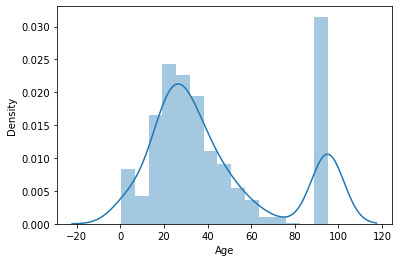

In [5]:
sns.distplot(data.Age.fillna(95))

There are 2 numerical variables in this dataset, Fare and Age. So let's go ahead and find out whether they present values that we could consider outliers.

### FARE

Text(0, 0.5, 'Number of Passengers')

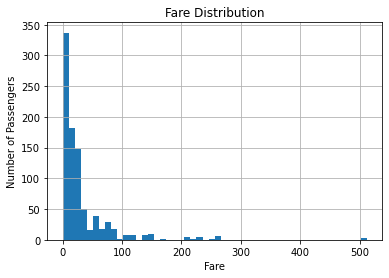

In [6]:
# First let's plot a histogram to get an idea of the distribution

fig = data.Fare.hist(bins=50)
fig.set_title('Fare Distribution')
fig.set_xlabel('Fare')
fig.set_ylabel('Number of Passengers')

Text(0, 0.5, 'Fare')

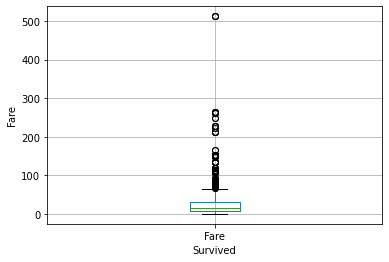

In [7]:
# another way of visualising outliers is using boxplots and whiskers,
# which provides the quantiles (box) and inter-quantile range (whiskers),
# with the outliers sitting outside the error bars (whiskers).

# All the dots in the plot below are outliers according to the quantiles + 1.5 IQR rule

fig = data.boxplot(column='Fare')
fig.set_title('')
fig.set_xlabel('Survived')
fig.set_ylabel('Fare')

In [8]:
# let's look at the values of the quantiles so we can
# calculate the upper and lower boundaries for the outliers

# 25%, 50% and 75% in the output below indicate the
# 25th quantile, median and 75th quantile respectively

data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [9]:
IQR = data.Fare.quantile(0.75) - data.Fare.quantile(0.25)

Lower_fence = data.Fare.quantile(0.25) - (IQR * 1.5)
Upper_fence = data.Fare.quantile(0.75) + (IQR * 1.5)

Upper_fence, Lower_fence, IQR

(65.6344, -26.724, 23.0896)

In [10]:
# And if we are looking at really extreme values
# using the interquantile proximity rule

IQR = data.Fare.quantile(0.75) - data.Fare.quantile(0.25)

Lower_fence = data.Fare.quantile(0.25) - (IQR * 3)
Upper_fence = data.Fare.quantile(0.75) + (IQR * 3)

Upper_fence, Lower_fence, IQR

(100.2688, -61.358399999999996, 23.0896)

The upper boundary for extreme outliers is a cost of 100 dollars for the Fare. The lower boundary is meaningless because there can't be a negative price for Fare.

In [11]:
# lets look at the actual number of passengers on the upper Fare ranges

print('total passengers: {}'.format(data.shape[0]))

print('passengers that paid more than 65: {}'.format(
    data[data.Fare > 65].shape[0]))

print("Passengers that paid more than 100: {}".format(data[data.Fare>100].shape[0]))

total passengers: 891
passengers that paid more than 65: 116
Passengers that paid more than 100: 53


In [12]:
# and percentages of passengers
total_passengers = np.float(data.shape[0])

print('total passengers: {}'.format(data.shape[0] / total_passengers))

print('passengers that paid more than 65: {}'.format(
    data[data.Fare > 65].shape[0] / total_passengers))

print('passengers that paid more than 100: {}'.format(
    data[data.Fare > 100].shape[0] / total_passengers))

total passengers: 1.0
passengers that paid more than 65: 0.13019079685746351
passengers that paid more than 100: 0.05948372615039282


C:\Users\DEVI\AppData\Local\Temp/ipykernel_41376/1121584186.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  total_passengers = np.float(data.shape[0])


When using the 3 times interquantile range interval to find outliers, we find that 6% of the passengers have paid extremely high fares. We can go ahead and investigate the nature of this outliers.

In [13]:
# let's create a separate dataframe for high fare payers
high_fare_df = data[data.Fare>100]

# ticket: it indicates the people that bought their fares together
high_fare_df.groupby('Ticket')['Fare'].count()

Ticket
113503      1
113760      4
113781      4
16966       2
17421       4
19950       4
24160       3
35273       3
36928       2
PC 17483    1
PC 17558    2
PC 17569    2
PC 17582    3
PC 17608    2
PC 17611    2
PC 17755    3
PC 17757    4
PC 17758    2
PC 17760    3
PC 17761    2
Name: Fare, dtype: int64

A group of people who bought their tickets together, say they were a family, would have the same ticket number. And the fare attached to them is no longer the individual Fare, rather the group Fare. This is why, we see this unusually high values:

In [14]:
multiple_tickets = pd.concat(
    [
        high_fare_df.groupby('Ticket')['Fare'].count(),
        high_fare_df.groupby('Ticket')['Fare'].mean()
    ],
    axis=1)

multiple_tickets.columns = ['Ticket', 'Fare']
multiple_tickets.head(10)

,Ticket,Fare
Ticket,,
113503,1,211.5000
113760,4,120.0000
113781,4,151.5500
16966,2,134.5000
17421,4,110.8833
19950,4,263.0000
24160,3,211.3375
35273,3,113.2750
36928,2,164.8667


Therefore, the fare should be divided by the number of tickets bought together to find out the individual price. So we see how finding out and investigating the presence of outliers, can lead us to new insight about the dataset at hand.

In [15]:
# let's have a look at the most extreme outliers
data[data.Fare>300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


These three people have the same ticket number, indicating that they were travelling together. The Fare price in this case, 512 is the price of 3 tickets, and not one. This is why, it is unusually high.

## AGE

Text(0, 0.5, 'Number of Passengers')

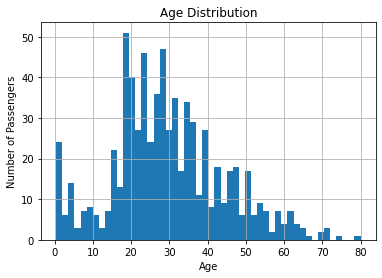

In [16]:
# First let's plot the histogram to get an idea of the distribution

fig = data.Age.hist(bins=50)
fig.set_title('Age Distribution')
fig.set_xlabel('Age')
fig.set_ylabel('Number of Passengers')

Text(0, 0.5, 'Age')

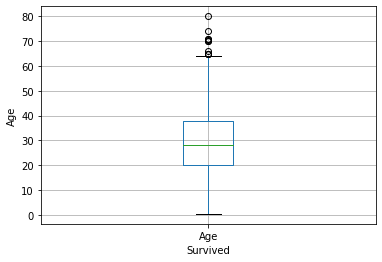

In [17]:
# now let's plot the boxplots and whiskers to visualise
# outliers

# remember that the dots in the plot indicate outliers,
# the box the interquantile range, and the whikers the 
# range IQR + or - 1.5 times the quantiles

fig = data.boxplot(column='Age')
fig.set_title('')
fig.set_xlabel('Survived')
fig.set_ylabel('Age')

In [18]:
data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [19]:
Upper_boundary = data.Age.mean() + 3* data.Age.std()
Lower_boundary = data.Age.mean() - 3* data.Age.std()

Upper_boundary, Lower_boundary

(73.27860964406095, -13.88037434994331)

The upper boundary for Age is 73-74 years. The lower boundary is meaningless as there can't be negative age. This value could be generated due to the lack of normality of the data.

In [20]:
# now let's use the interquantile range to calculate the boundaries

IQR = data.Age.quantile(0.75) - data.Age.quantile(0.25)

Lower_fence = data.Age.quantile(0.25) - (IQR * 1.5)
Upper_fence = data.Age.quantile(0.75) + (IQR * 1.5)

Upper_fence, Lower_fence, IQR

(64.8125, -6.6875, 17.875)

In [21]:
# and for extreme outliers

IQR = data.Age.quantile(0.75) - data.Age.quantile(0.25)

Lower_fence = data.Age.quantile(0.25) - (IQR * 3)
Upper_fence = data.Age.quantile(0.75) + (IQR * 3)

Upper_fence, Lower_fence, IQR

(91.625, -33.5, 17.875)

The boundary using 1.5 times the interquantile range coincides roughly with the boundary determined using the Gaussian distribution (64 vs 71 years). The value using the 3 times the interquantile is a bit high according to normal human life expectancy, particularly in the days of the Titanic.

In [22]:
data = data.dropna(subset=['Age'])

total_passengers = np.float(data.shape[0])

print('passengers older than 73 (Gaussian approach): {}'.format(
    data[data.Age > 73].shape[0] / total_passengers))

print('passengers older than 65 (IQR): {}'.format(
    data[data.Age > 65].shape[0] / total_passengers))

print('passengers older than 91 (IQR, extreme): {}'.format(
    data[data.Age >= 91].shape[0] / total_passengers))

passengers older than 73 (Gaussian approach): 0.0028011204481792717
passengers older than 65 (IQR): 0.011204481792717087
passengers older than 91 (IQR, extreme): 0.0


C:\Users\DEVI\AppData\Local\Temp/ipykernel_41376/2798391666.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  total_passengers = np.float(data.shape[0])


Roughly ~1-2 percent of the passengers were extremely old.

In [23]:
data[data.Age>65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


We can see that the majority of the outliers did not survive

### Measuring the effect of outliers on different machine learning algorithms

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [28]:
data=pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
data[['Age', 'Fare']].isnull().mean()

Age     0.198653
Fare    0.000000
dtype: float64

Age contains 20 % of missing data. For simplicity, I will fill the missing values with 0.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    data[['Age', 'Fare']].fillna(0),
    data.Survived,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((623, 2), (268, 2))

In [33]:
data_clean = data.copy()
data_clean.loc[data_clean.Age>=73,'Age']=73
data_clean.loc[data_clean.Age>100,'Fare']=100

X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    data_clean[['Age', 'Fare']].fillna(0),
    data_clean.Survived,
    test_size=0.3,
    random_state=0)

### Outlier effect on Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Initialize the Logistic Regression model
logit = LogisticRegression(random_state=44)

# Fit the model on the training data
logit.fit(X_train, y_train)

# Predict the probabilities on the test data
pred = logit.predict_proba(X_test)

# Print the accuracy and roc-auc score
print('LogReg Accuracy: {}'.format(logit.score(X_test, y_test)))
print('LogReg roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))


LogReg Accuracy: 0.6940298507462687
LogReg roc-auc: 0.71375


In [38]:
# model build on data without outliers

# call model
logit = LogisticRegression(random_state=44)

# train
logit.fit(X_train_clean, y_train_clean)

# make prediction on test set
pred = logit.predict_proba(X_test_clean)

print('LogReg Accuracy: {}'.format(logit.score(X_test_clean, y_test_clean)))
print('LogReg roc-auc: {}'.format(roc_auc_score(y_test_clean, pred[:, 1])))

LogReg Accuracy: 0.6940298507462687
LogReg roc-auc: 0.7136904761904761


Outliers did not seem to have a big impact in the performance of Logistic regression.

## Outlier Effect on Adaboost

In [40]:
ada= AdaBoostClassifier(n_estimators=200, random_state=44)
ada.fit(X_train_clean,y_train_clean)
pred = ada.predict_proba(X_test_clean)

print('AdaBoost Accuracy: {}'.format(ada.score(X_test_clean, y_test_clean)))
print('AdaBoost roc-auc: {}'.format(roc_auc_score(y_test_clean, pred[:,1])))

AdaBoost Accuracy: 0.7164179104477612
AdaBoost roc-auc: 0.7429464285714286


On the other hand, we can see how removing outliers improves the performance of Adaboost: 0.742 vs 0.71 roc-auc.

## Outlier Effect on Random Forests

In [41]:
rf = RandomForestClassifier(n_estimators=200, random_state=39)

# train model
rf.fit(X_train, y_train)

# make predictions
pred = rf.predict_proba(X_test)

print('Random Forests Accuracy: {}'.format(rf.score(X_test, y_test)))
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

Random Forests Accuracy: 0.7089552238805971
Random Forests roc-auc: 0.732827380952381


In [42]:
# model built on data without outliers

# call model
rf = RandomForestClassifier(n_estimators=200, random_state=39)

# train model
rf.fit(X_train_clean, y_train_clean)

# make predictions
pred = rf.predict_proba(X_test_clean)

print('Random Forests Accuracy: {}'.format(rf.score(X_test_clean, y_test_clean)))
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test_clean, pred[:,1])))

Random Forests Accuracy: 0.7052238805970149
Random Forests roc-auc: 0.732470238095238


As expected, Random Forests do not benefit from removing outliers from the dataset.

### Conclusion:

We can see that the presence of outliers affects the performance of AdaBoost, and when outliers are removed the roc-auc improved by 0.03.

Logistic Regression's and Random Forests performances seemed unaffected by outliers.